In [1]:
import pandas as pd
for filename in ['data/gapminder_gdp_africa.csv', 'data/gapminder_gdp_asia.csv']:
    data = pd.read_csv(filename, index_col='country')
    print(filename, data.min())

data/gapminder_gdp_africa.csv gdpPercap_1952    298.846212
gdpPercap_1957    335.997115
gdpPercap_1962    355.203227
gdpPercap_1967    412.977514
gdpPercap_1972    464.099504
gdpPercap_1977    502.319733
gdpPercap_1982    462.211415
gdpPercap_1987    389.876185
gdpPercap_1992    410.896824
gdpPercap_1997    312.188423
gdpPercap_2002    241.165876
gdpPercap_2007    277.551859
dtype: float64
data/gapminder_gdp_asia.csv gdpPercap_1952    331.0
gdpPercap_1957    350.0
gdpPercap_1962    388.0
gdpPercap_1967    349.0
gdpPercap_1972    357.0
gdpPercap_1977    371.0
gdpPercap_1982    424.0
gdpPercap_1987    385.0
gdpPercap_1992    347.0
gdpPercap_1997    415.0
gdpPercap_2002    611.0
gdpPercap_2007    944.0
dtype: float64


In [2]:
import glob
print('all csv in data directory:', glob.glob('data/*.csv'))

all csv in data directory: ['data/gapminder_gdp_americas.csv', 'data/gapminder_gdp_europe.csv', 'data/gapminder_all.csv', 'data/gapminder_gdp_oceania.csv', 'data/gapminder_gdp_africa.csv', 'data/gapminder_gdp_asia.csv']


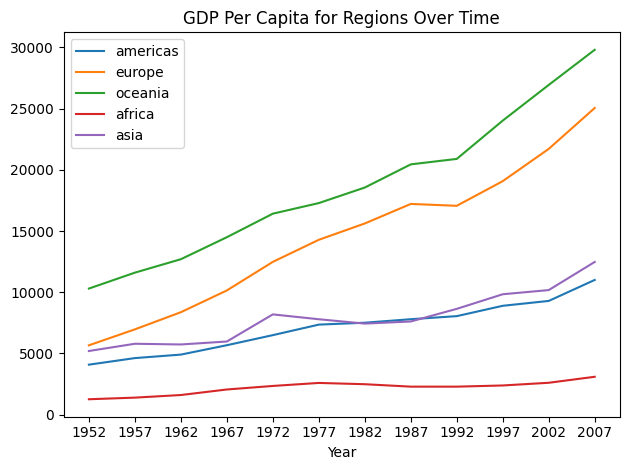

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
for filename in glob.glob('data/gapminder_gdp*.csv'):
    dataframe = pd.read_csv(filename)
    # extract <region> from the filename, expected to be in the format 'data/gapminder_gdp_<region>.csv'.
    # we will split the string using the split method and `_` as our separator,
    # retrieve the last string in the list that split returns (`<region>.csv`), 
    # and then remove the `.csv` extension from that string.
    # NOTE: the pathlib module covered in the next callout also offers
    # convenient abstractions for working with filesystem paths and could solve this as well:
    # from pathlib import Path
    # region = Path(filename).stem.split('_')[-1]
    region = filename.split('_')[-1][:-4]
    # extract the years from the columns of the dataframe 
    headings = dataframe.columns[1:]
    years = headings.str.split('_').str.get(1)
    # pandas raises errors when it encounters non-numeric columns in a dataframe computation
    # but we can tell pandas to ignore them with the `numeric_only` parameter
    dataframe.mean(numeric_only=True).plot(ax=ax, label=region)
    # NOTE: another way of doing this selects just the columns with gdp in their name using the filter method
    # dataframe.filter(like="gdp").mean().plot(ax=ax, label=region)
# set the title and labels
ax.set_title('GDP Per Capita for Regions Over Time')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.set_xlabel('Year')
plt.tight_layout()
plt.legend()
plt.show()